Khai báo thư viện

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os.path
from os import path
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Input dữ liệu

In [2]:
stock_prices_1 = pd.read_csv("VCB_Stock_Price.csv")
stock_prices = stock_prices_1[['Date', 'Close']]
stock_prices = stock_prices.set_index("Date")
stock_prices

,Close
Date,
01/02/2018,53388
01/03/2018,53291
01/04/2018,53776
01/05/2018,52417
01/08/2018,53776
...,...
04/20/2021,103000
04/22/2021,103000
04/23/2021,104000


Chia tập train, test

In [3]:
train=stock_prices.iloc[:600]
test=stock_prices.iloc[600:]
print("Kích thước tập ban đầu là: ",stock_prices.shape)
print("Kích thước tập huấn luyện là: ",train.shape)
print("Kích thước tập thử nghiệm là: ",test.shape)

Kích thước tập ban đầu là:  (818, 1)
Kích thước tập huấn luyện là:  (600, 1)
Kích thước tập thử nghiệm là:  (218, 1)


Chuẩn hóa dữ liệu

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaler = sc.fit_transform(train)
test_scaler = sc.fit_transform(test)

In [5]:
x_train = []
y_train = []
len_train = len(train)


In [6]:
for i in range(60, len_train):
    x_train.append(train_scaler[i-60:i, 0])
    y_train.append(train_scaler[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Xây dựng mô hình

In [7]:

regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Huấn luyện mô hình

In [8]:
if path.exists("mymodel.h5"):
    regressor.load_weights("mymodel.h5")
else:
    # Con khong thi train
    regressor.fit(x_train, y_train, epochs = 100, batch_size = 32)
    regressor.save("mymodel.h5")

Dự báo

In [9]:
inputs = stock_prices[len(stock_prices) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [10]:
x_test = []
len_input = len(inputs)

In [11]:
for i in range(60, len_input):
    x_test.append(inputs[i-60:i, 0])

In [12]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

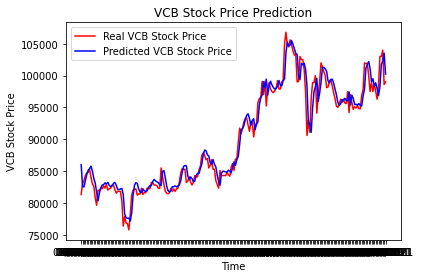

In [13]:
plt.plot(test['Close'], color = 'red', label = 'Real VCB Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted VCB Stock Price')
plt.title('VCB Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('VCB Stock Price')
plt.legend()
plt.show()